___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load Dataset

In [236]:
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [237]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [238]:
df.shape

(200, 5)

In [239]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Explore Data

You can rename columns to more usable, if you need.

In [241]:
#Rename some of the columns that have abbreviations
df.rename(columns={'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'},
                   inplace=True)

In [242]:
df.isnull().sum().any()

False

In [243]:
df.duplicated().sum()

0

In [244]:
#Dropping the CustomerID column, since it delivers nothing regarding our data.
df = df.drop(['CustomerID'], axis=1)
df

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





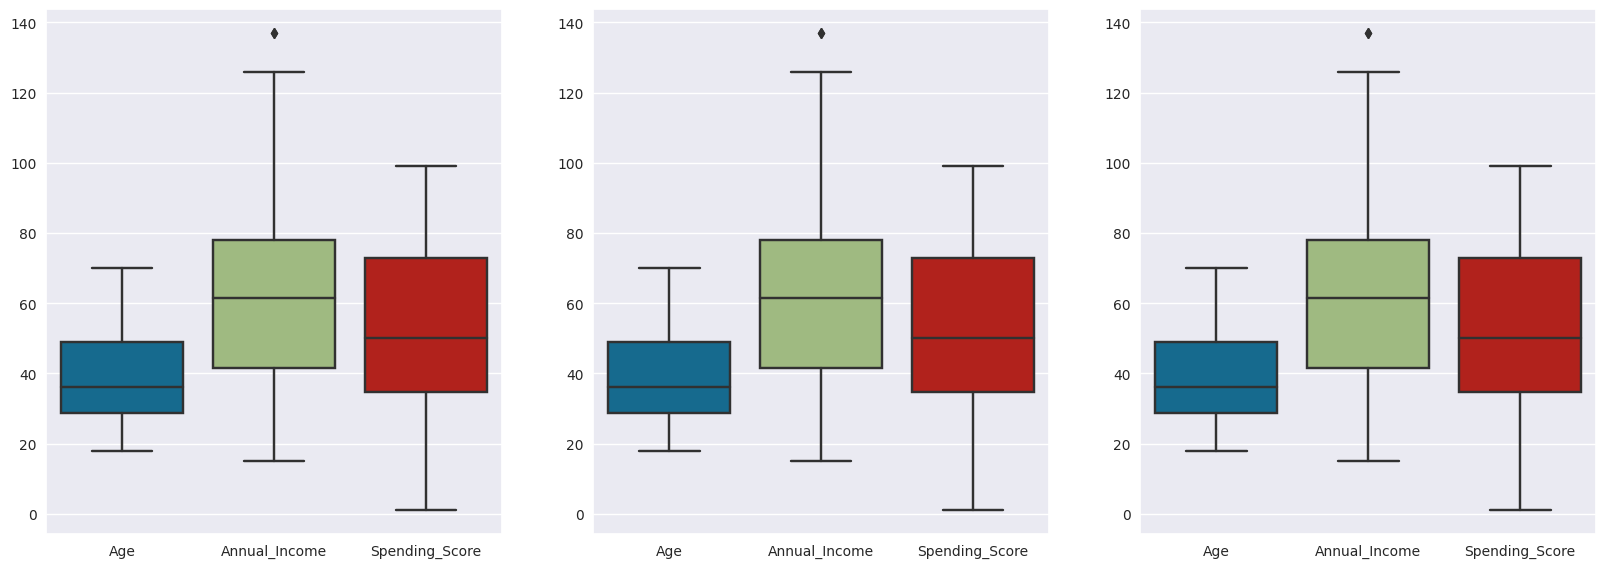

In [245]:
# Appling the Box plots to check the outliers

index = 0
plt.figure(figsize=(20,15))
for feature in df.select_dtypes("number"):
    if feature != "class":
        index += 1
        plt.subplot(2,3,index)
        sns.boxplot(data=df)

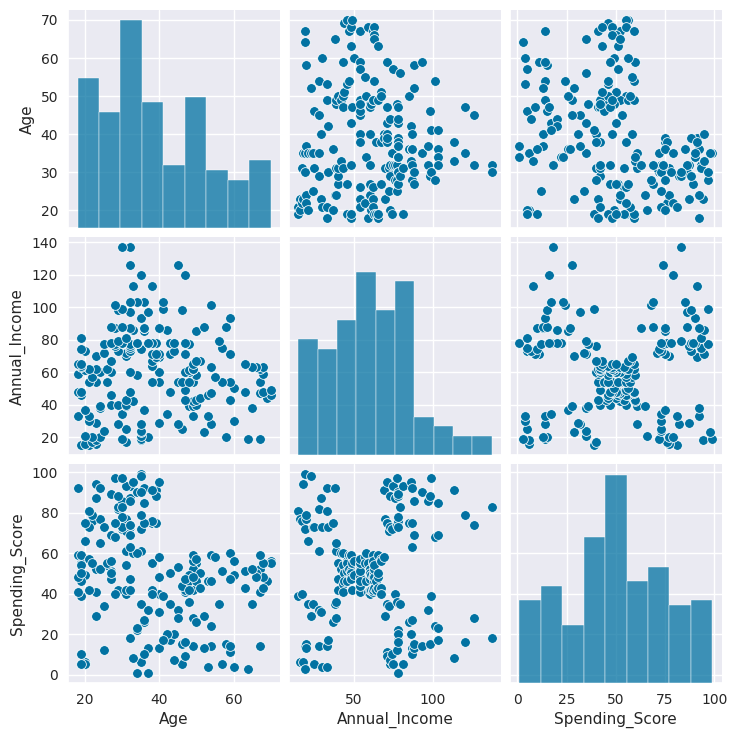

In [246]:
#Appling the pair plot to distinguish the number of clusters and visualize some relations between the variables
sns.pairplot(df)
plt.show()

In [247]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

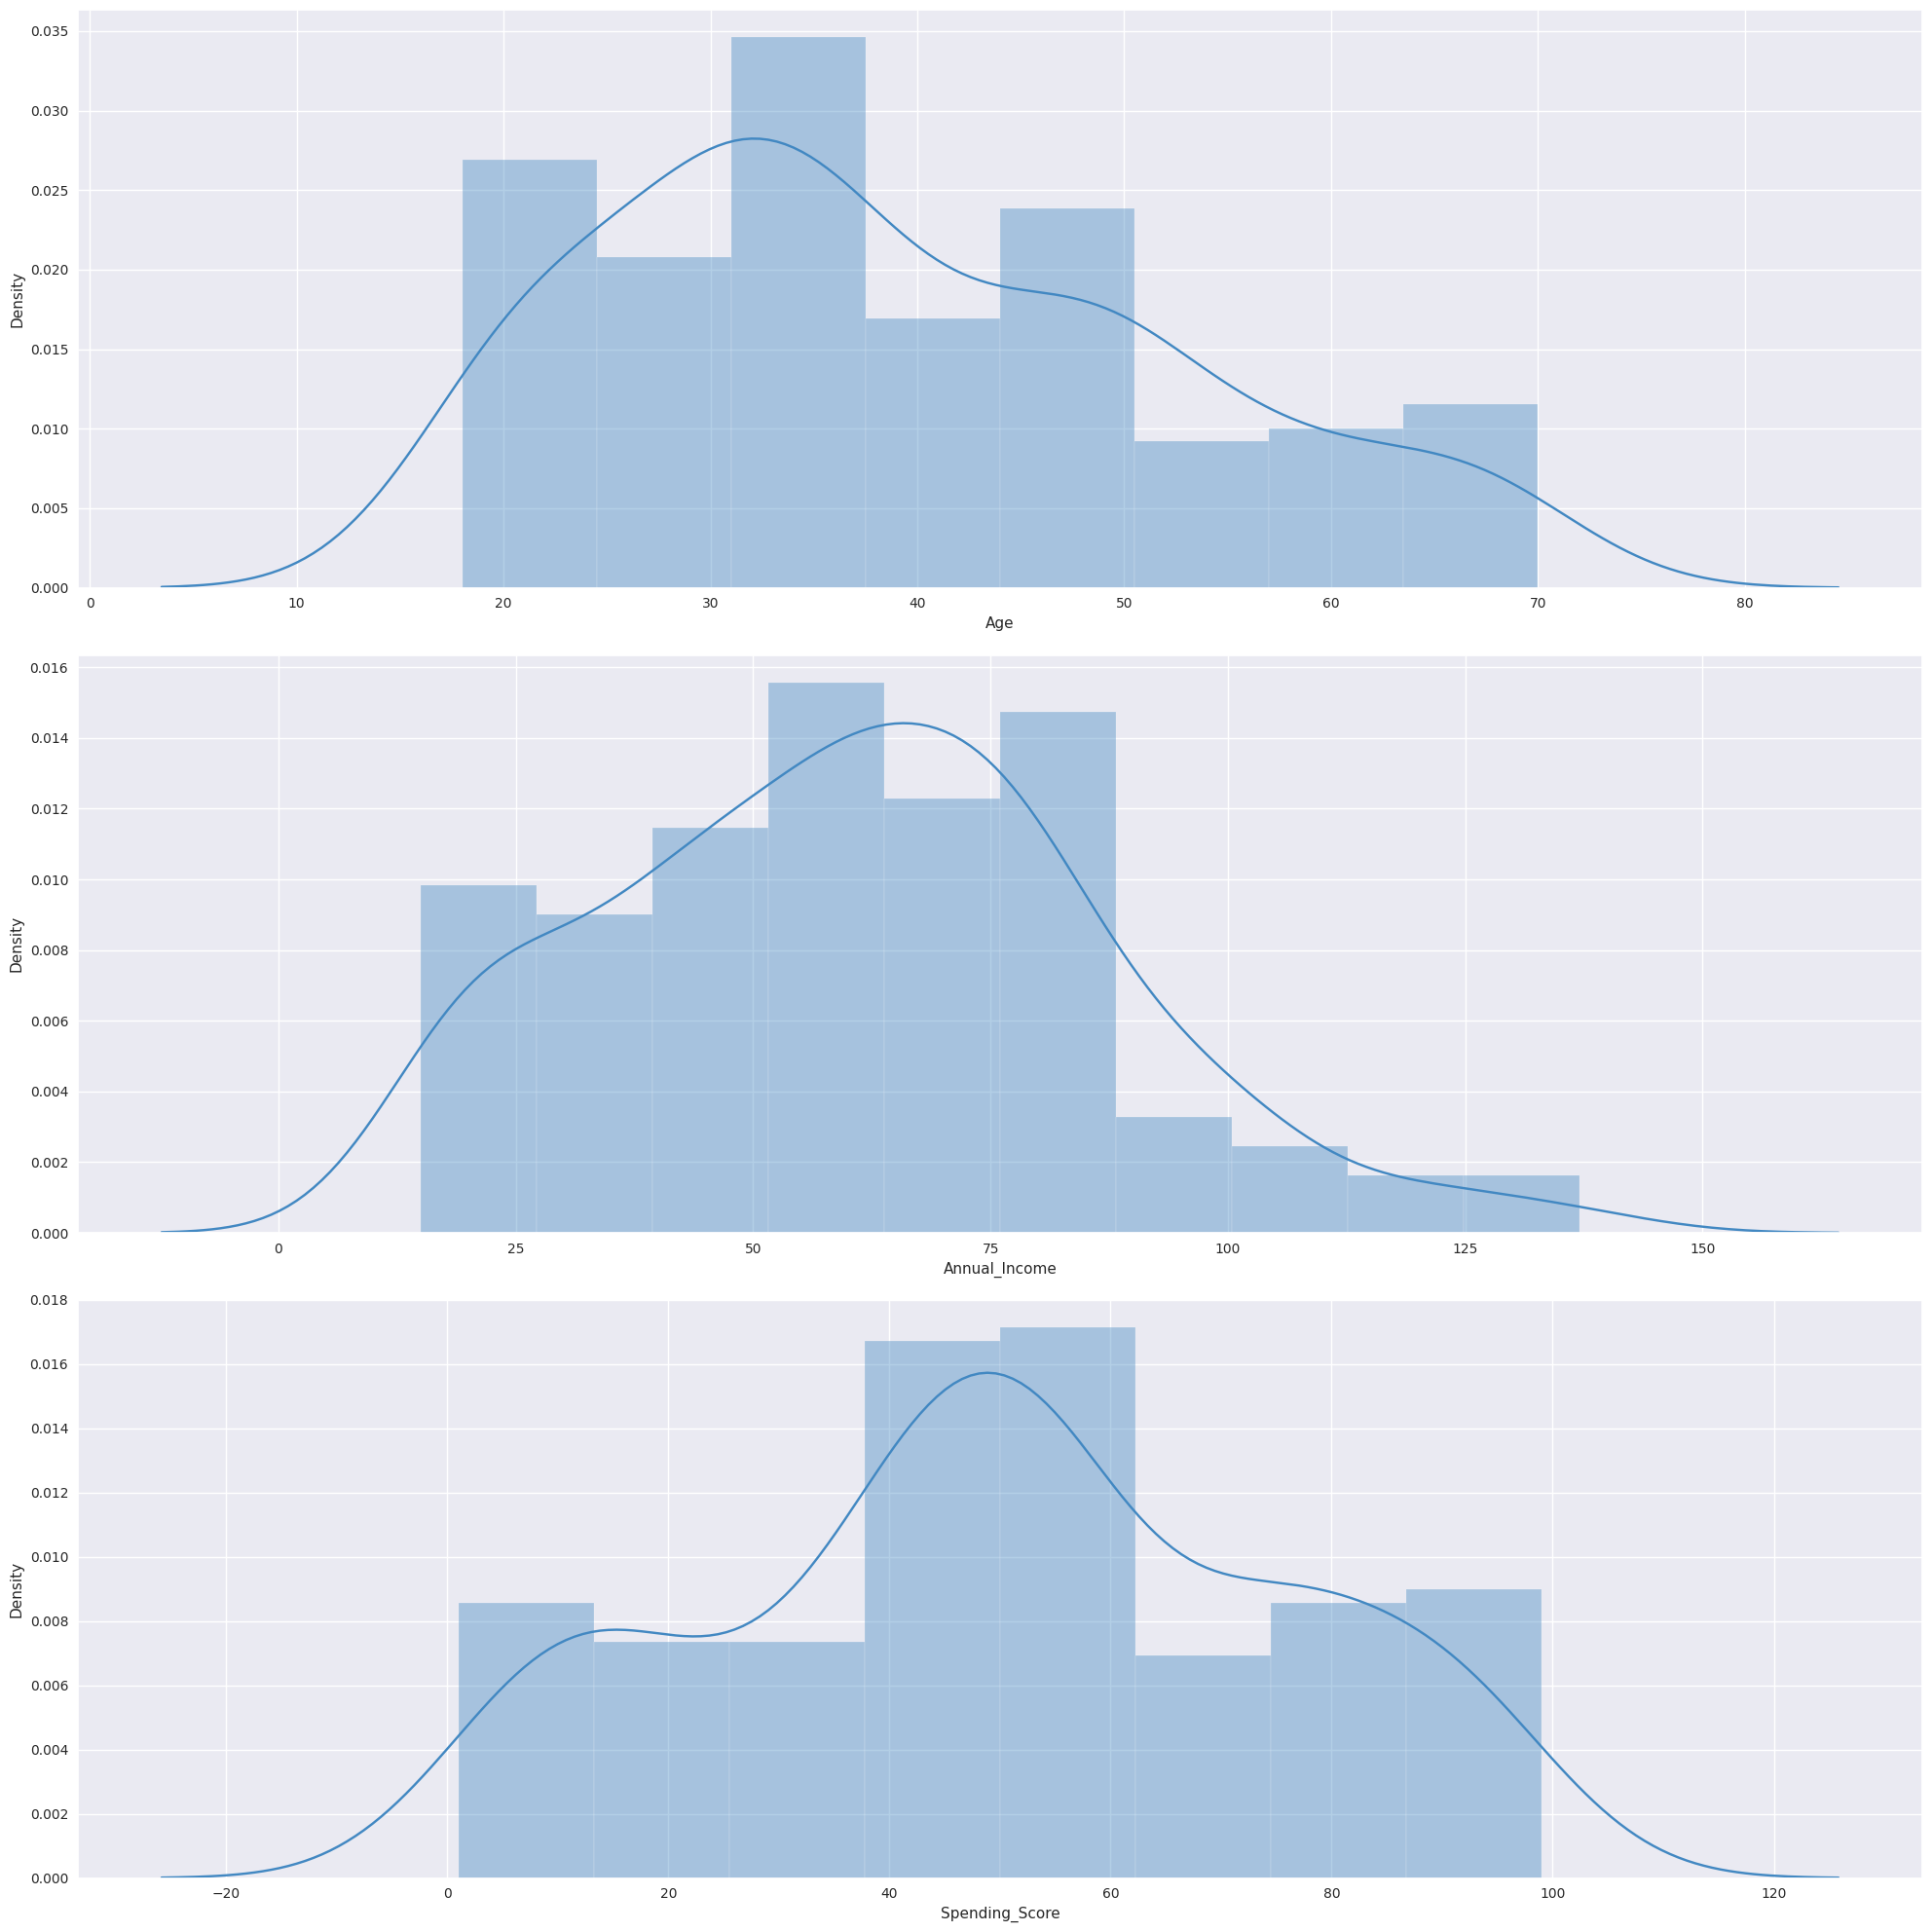

In [248]:
#visualize the data distribution
plt.figure(figsize = (20, 20))
column=['Age', 'Annual_Income','Spending_Score']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

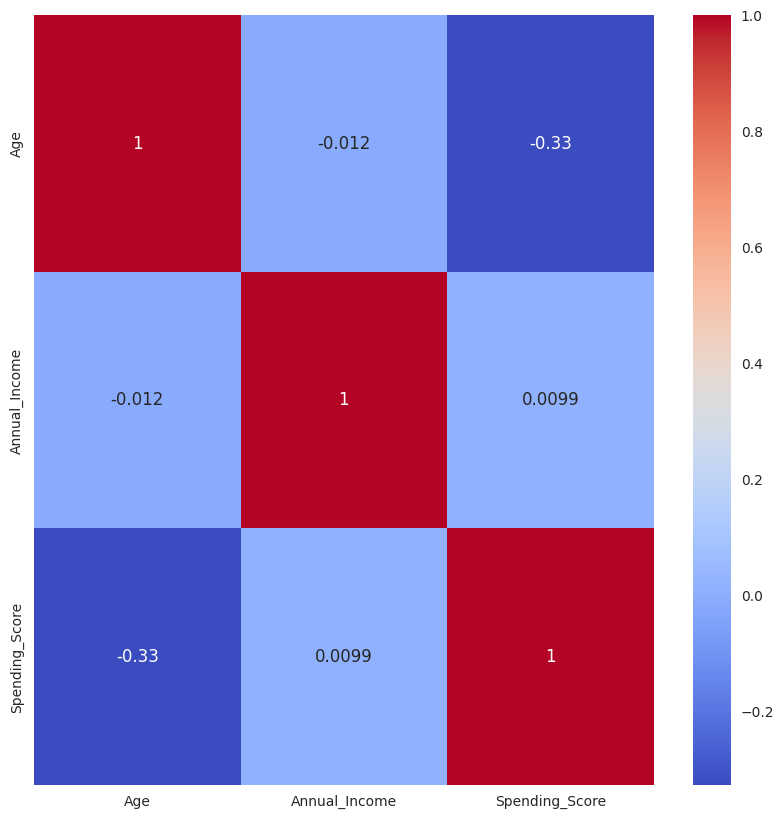

In [249]:
#check the data correlations
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [250]:
#check the categorical column values
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [251]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Female    112
Male       88
Name: Gender, dtype: int64


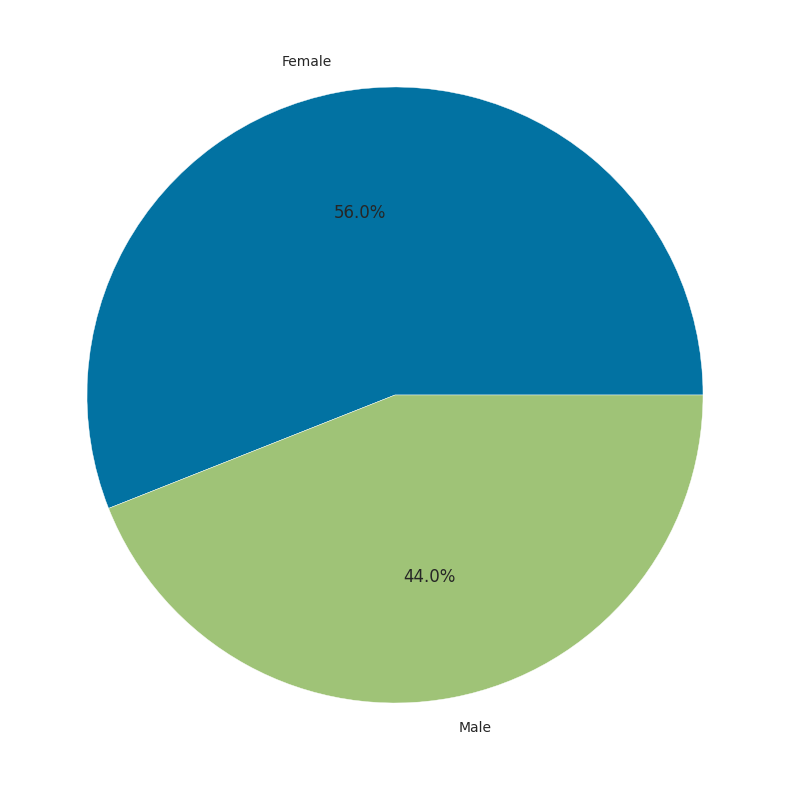

In [252]:
#visualize the categorical column "Gender"
print(df["Gender"].value_counts())
df["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10))
plt.ylabel("");

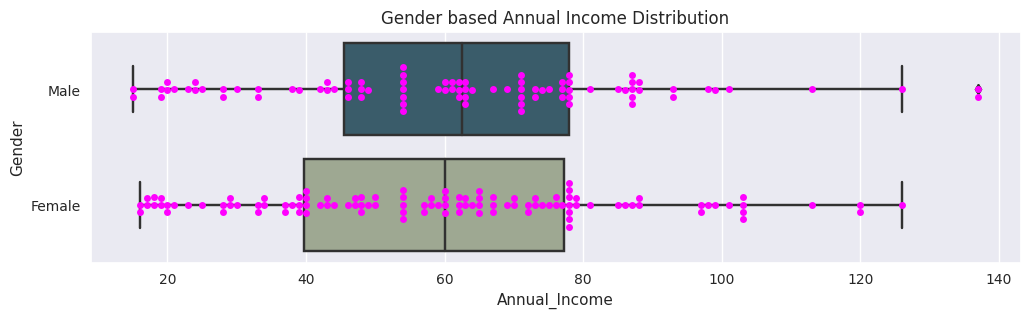

In [253]:
plt.figure(figsize=(12, 3))
sns.swarmplot(x='Annual_Income', y='Gender', data=df, color="magenta")
sns.boxplot(x='Annual_Income', y='Gender', data=df, saturation=0.3)
plt.title('Gender based Annual Income Distribution')
plt.show()

In [254]:
#convert the Gender column to numerical using "mapping"
mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(mapping)
print(df['Gender'])

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64


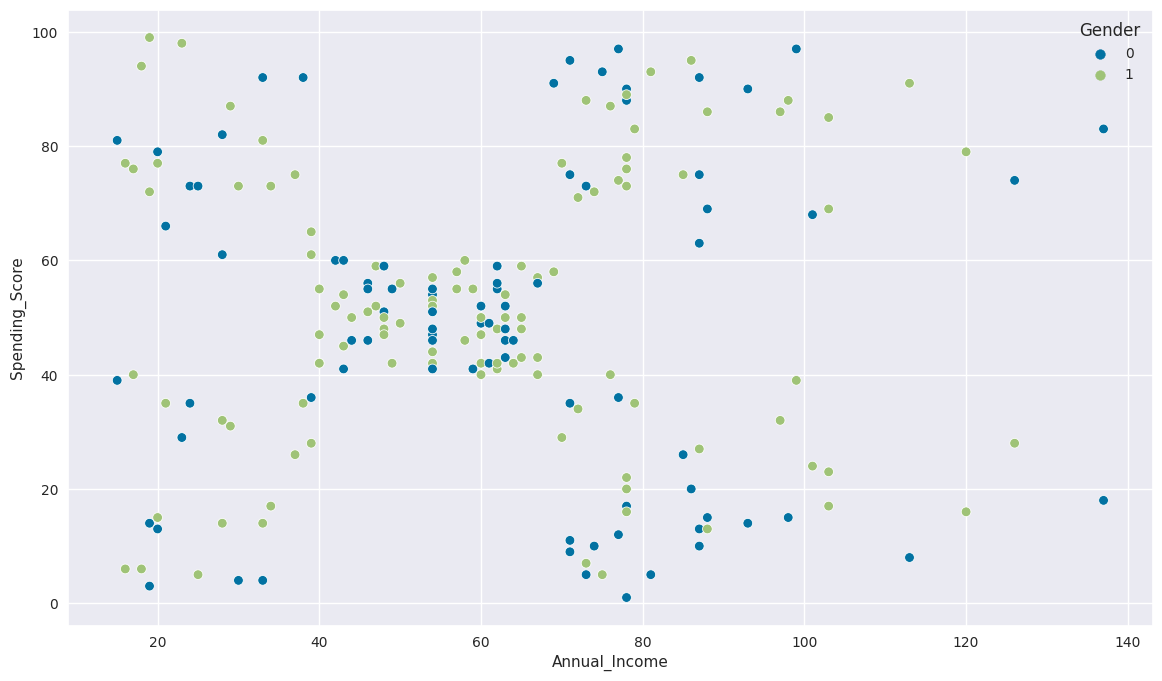

In [255]:
#visualize two features with the scatter plot
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue="Gender")
plt.show()

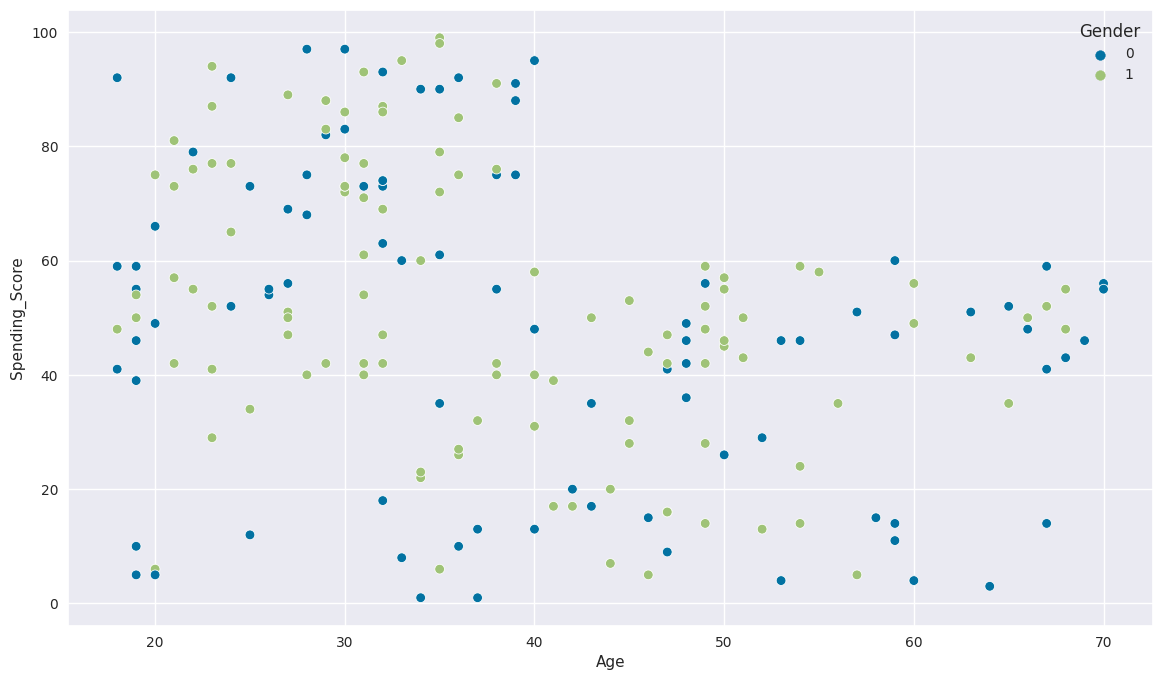

In [256]:
#visualize other remaining two features with the scatter plot
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Age', y='Spending_Score', data=df, hue="Gender")
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

In [257]:
X1=df.iloc[:, [1,3]]
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [258]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [259]:
hopkins(df, 1)

0.6866880051509876

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [260]:
hopkins(X1, 1)

0.7296147281546584

#### *ii. Determine optimal number of clusters using inertia and distortion*

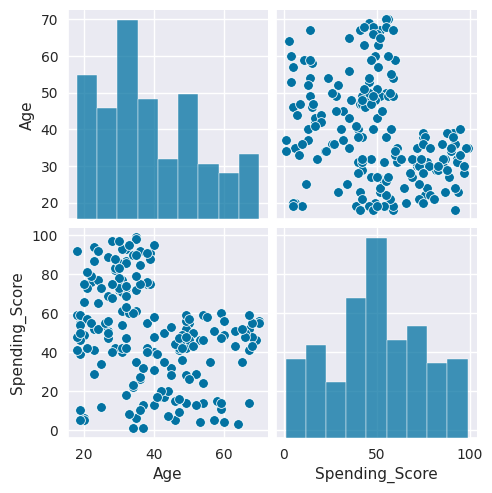

In [261]:
#visulize our dataframe (X1)
sns.pairplot(X1);

In [262]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

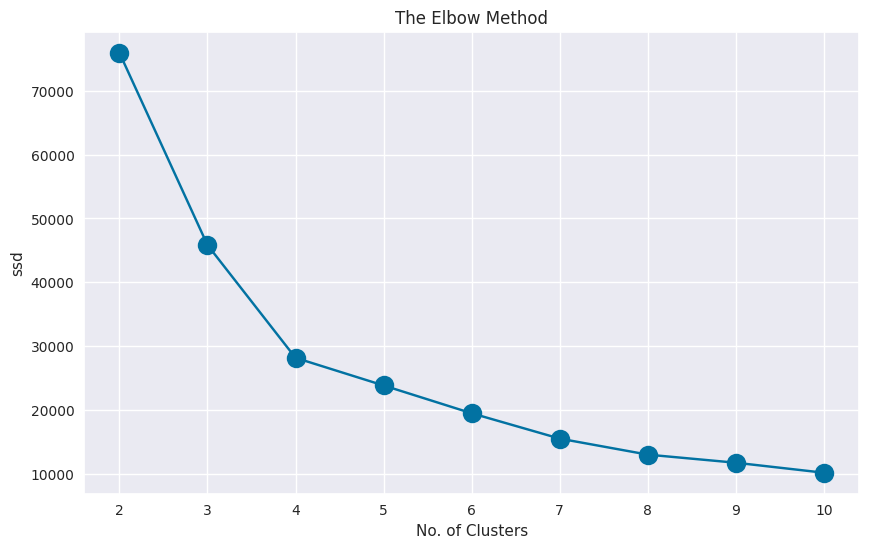

In [263]:
#inertia method to find the best number of clusters
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)  # distances from each observation to each cluster centroid

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

Text(0.5, 1.0, 'elbow method')

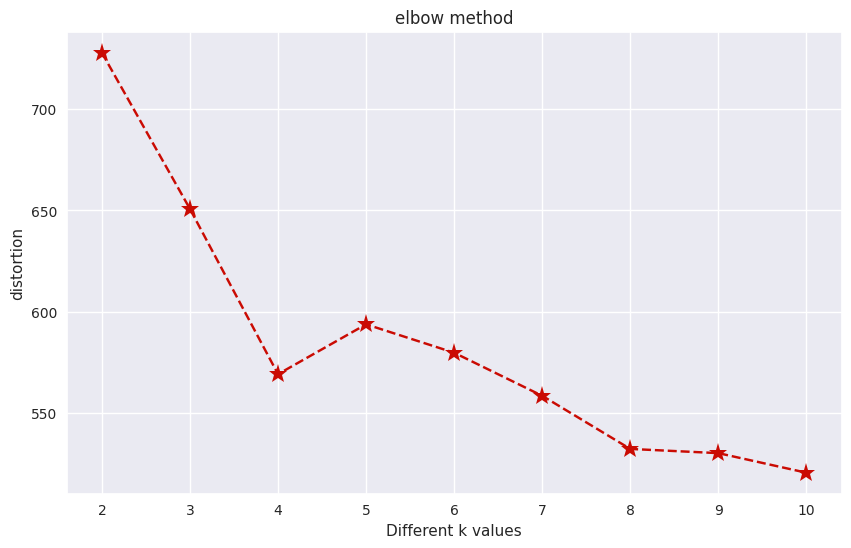

In [264]:
#distortion method to find the best number of clusters
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X1)
    distances = kmeanModel.transform(X1) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

**silhoutte_score**

In [265]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


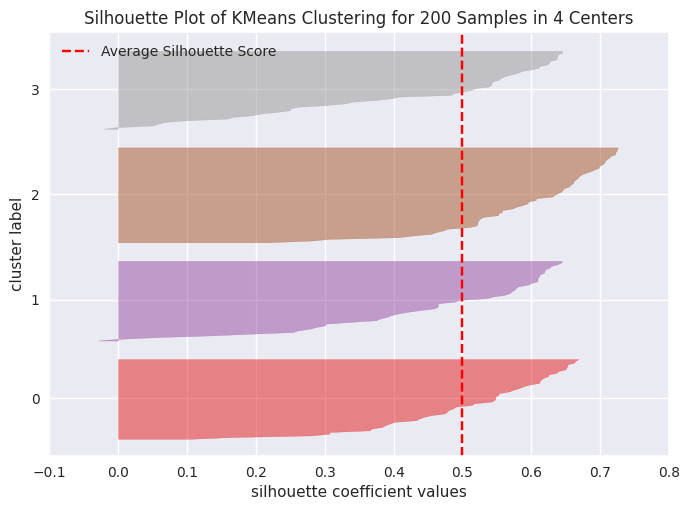

In [266]:
#silhoutte score for all clusters
from yellowbrick.cluster import SilhouetteVisualizer

model_1 = KMeans(n_clusters=4,
                random_state=42)
visualizer = SilhouetteVisualizer(model_1)

visualizer.fit(X1)
visualizer.poof();


In [267]:
model_1.n_clusters

4

In [268]:
for i in range(4):
    label = (model_1.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}") #we have 4 clusters..
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### Why silhouette_score is negative?

![image.png](attachment:image.png)

*We don't have any of negative values for the silhouette_score*


#### *iii. Apply K Means*

In [269]:
kmeans_model = KMeans(n_clusters=4,
                random_state=42)

kmeans_model.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [270]:
#Take a copy of the data that we will work with
df_X1 = X1.copy()
df_X1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [271]:
#define a new column(variable) to store the clusters and add it to the dataframe
df_X1["predicted_clusters"] = kmeans_model.fit_predict(X1)
df_X1

,Age,Spending_Score,predicted_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

In [272]:
clusters = kmeans_model.labels_
clusters

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

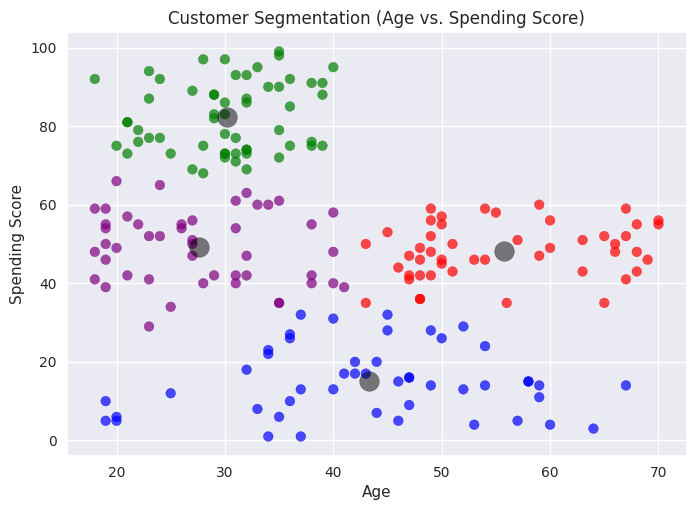

In [273]:
# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

plt.scatter(X1['Age'],
            X1['Spending_Score'],
            c=[cluster_colors[i] for i in df_X1.predicted_clusters],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()

In [274]:
#Interpretation of the labels meaning from the scatter plot
labels={0:'old med spenders', 1:'diverse low spenders',
        2:'young high spenders', 3:'young med spenders'}

df_X1['Meaningful Labels']=df_X1['predicted_clusters'].map(labels)
df_X1.head()

,Age,Spending_Score,predicted_clusters,Meaningful Labels
0,19,39,3,young med spenders
1,21,81,2,young high spenders
2,20,6,1,diverse low spenders
3,23,77,2,young high spenders
4,31,40,3,young med spenders


### Clustering based on Annual Income and Spending Score

In [275]:
X2=df.iloc[:, [2,3]]
X2.head()
#X1 = Age & Spending_Score
#X2 = Annual_Income & Spending_Score

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [276]:
hopkins(X2, 1)

0.6920709944614706

#### *ii. Determine optimal number of clusters*

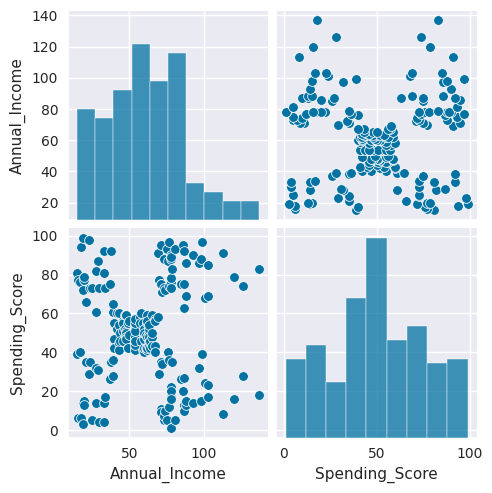

In [277]:
#visualize our dataframe (X1) distribution
sns.pairplot(X2);

We can indicate from the previous figuer that we can choose 5 clusters

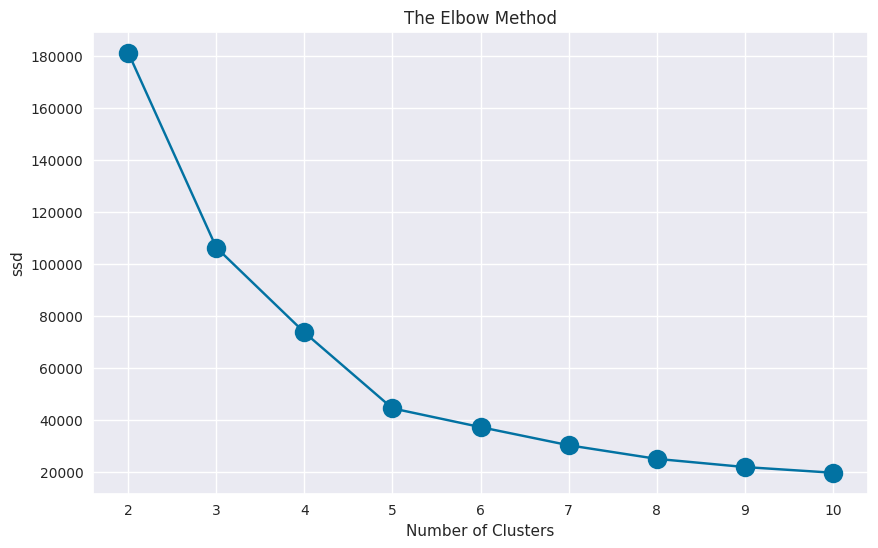

In [278]:
#inertia method to find the best number of clusters

ssd = []
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_) # distances from each observation to each cluster centroid

plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-", markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [279]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6974.157303
6     5247.817858
7     3149.746677
8     2190.019823
dtype: float64

Text(0.5, 1.0, 'elbow method')

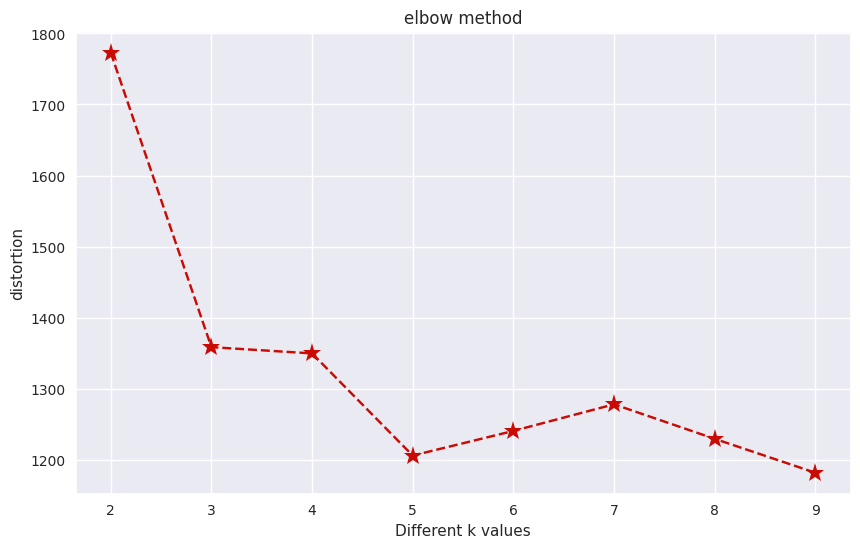

In [280]:
#distortion method to find the best number of clusters

K = range(2, 10)
distortion = []

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X2)
    distances = kmeanModel.transform(X2) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_

    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

**silhouette_score**

In [281]:
range_n_clusters = range(2, 11)

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


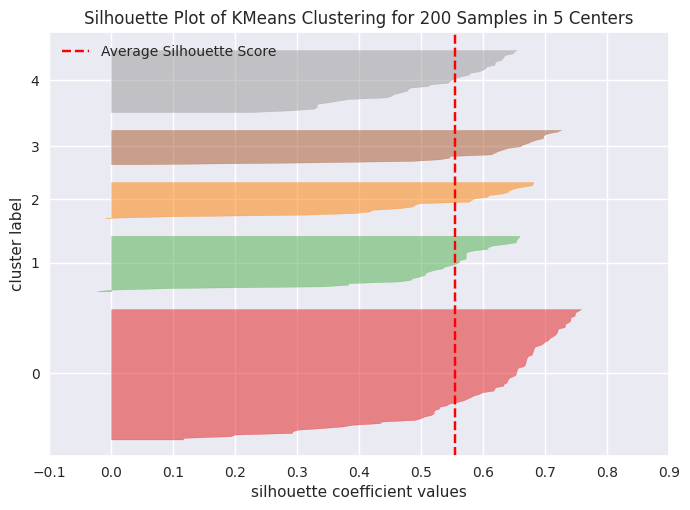

In [283]:
#silhouette_score for all the clusters
model_2 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model_2)

visualizer.fit(X2)
visualizer.poof();

In [282]:
silhouette_score(X2, model_2.labels_)

0.553931997444648

In [284]:
for i in range(model_2.n_clusters):
    label = (model_2.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5039873487056818
mean silhouette score for label 2    : 0.5122676140736505
mean silhouette score for label 3    : 0.5990128687006722
mean silhouette score for label 4    : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [286]:
K_means_model_2 = KMeans(n_clusters=5,
                       random_state=42)
K_means_model_2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [287]:
#Take a copy of the data that we will work with
df_X2 = X2.copy()
df_X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [288]:
df_X2['predicted_clusters'] = K_means_model_2.fit_predict(X2)
df_X2

,Annual_Income,Spending_Score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

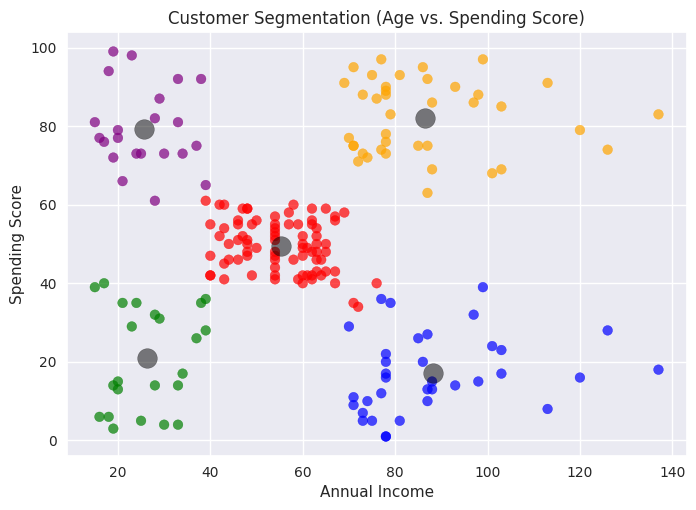

In [289]:
# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
centers = K_means_model_2.cluster_centers_
# Assuming X1.predicted_clusters contains the cluster labels

# Plot the data points with cluster colors
plt.scatter(X2['Annual_Income'],
            X2['Spending_Score'],
            c=[cluster_colors[i] for i in df_X2.predicted_clusters],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()

In [290]:
#Interpretation of the labels meaning from the scatter plot
labels={0:'med income med spenders', 1:'high income low spenders',
        2:'low income low spenders', 3:'low income high spenders', 4:'high income high spenders'}

df_X2['Meaningful Labels']=df_X2['predicted_clusters'].map(labels)
df_X2.head()

,Annual_Income,Spending_Score,predicted_clusters,Meaningful Labels
0,15,39,2,low income low spenders
1,15,81,3,low income high spenders
2,16,6,2,low income low spenders
3,16,77,3,low income high spenders
4,17,40,2,low income low spenders


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [291]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [294]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Clustering based on Age and Spending Score- x1

In [295]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [296]:
X1

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [297]:
hopkins(X1, 0.1)

0.6491766886243425

## Since we got a value more than 0.5 we can continue with Clustering

In [298]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

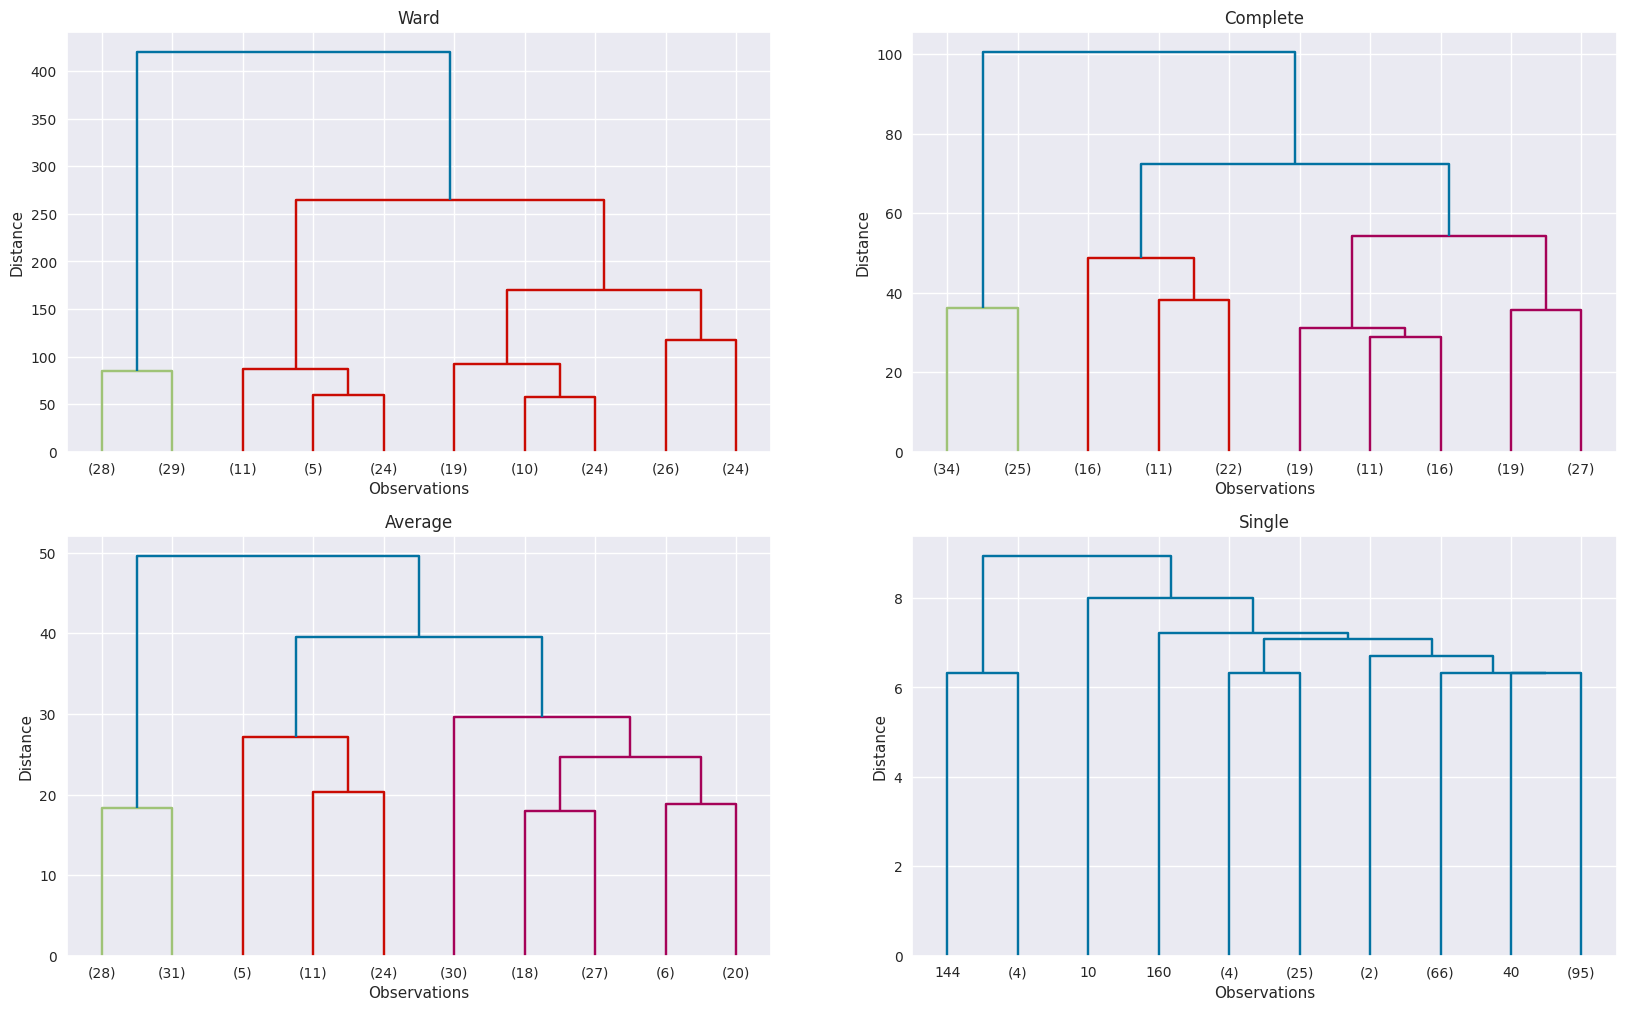

In [299]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);



## I determined that I will use 4 clusters using the ward method.

### ii. *Apply Agglomerative Clustering*

In [300]:
# let's make sure of that by applying silhouette_score
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


#### Age and Spending Score- x1

In [301]:
from sklearn.cluster import AgglomerativeClustering

In [302]:
model_3 =  AgglomerativeClustering(n_clusters=4,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_x1 = model_3.fit_predict(X1)

In [303]:
model_3.labels_

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [304]:
#adding the clusters of Kmeans and Hirarical to compare
df_X1['cluster_Agg'] = clusters_x1
df_X1.head()

,Age,Spending_Score,predicted_clusters,Meaningful Labels,cluster_Agg
0,19,39,3,young med spenders,0
1,21,81,2,young high spenders,3
2,20,6,1,diverse low spenders,2
3,23,77,2,young high spenders,3
4,31,40,3,young med spenders,0


#### Annual Income and Spending Score- x2

In [343]:
hc_ward = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

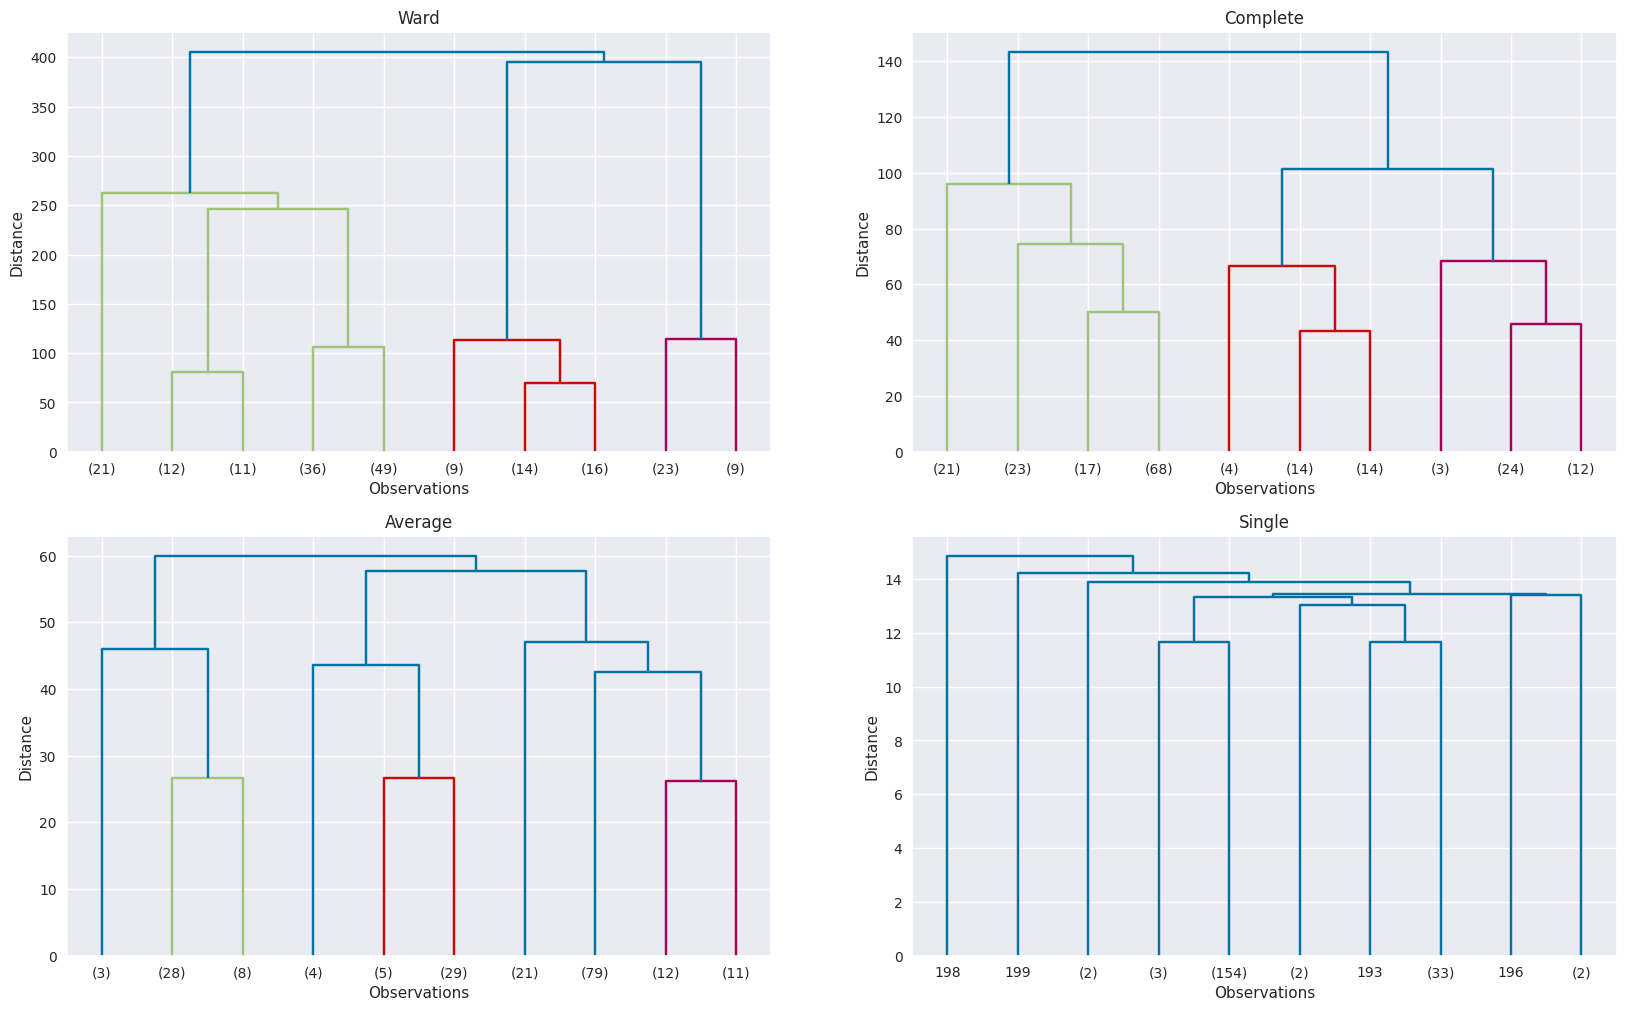

In [344]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [305]:
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


**It seems that the best cluster number here is 5, since it has the hight value of silhouette_score.**

In [306]:
model_4 = AgglomerativeClustering(n_clusters=5,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_x2 = model_4.fit_predict(X2)

In [307]:
model_4.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [308]:
X2.columns

Index(['Annual_Income', 'Spending_Score'], dtype='object')

In [309]:
clusters = model_4.labels_
df_X2["Agg_clusters"] = clusters
df_X2

,Annual_Income,Spending_Score,predicted_clusters,Meaningful Labels,Agg_clusters
0,15,39,2,low income low spenders,4
1,15,81,3,low income high spenders,3
2,16,6,2,low income low spenders,4
3,16,77,3,low income high spenders,3
4,17,40,2,low income low spenders,4
...,...,...,...,...,...
195,120,79,4,high income high spenders,2
196,126,28,1,high income low spenders,0
197,126,74,4,high income high spenders,2
198,137,18,1,high income low spenders,0


### iii. *Visualizing and Labeling All the Clusters*

In [345]:
X1.columns

Index(['Age', 'Spending_Score'], dtype='object')

#### Age and Spending Score- x1

<Axes: xlabel='Age', ylabel='Spending_Score'>

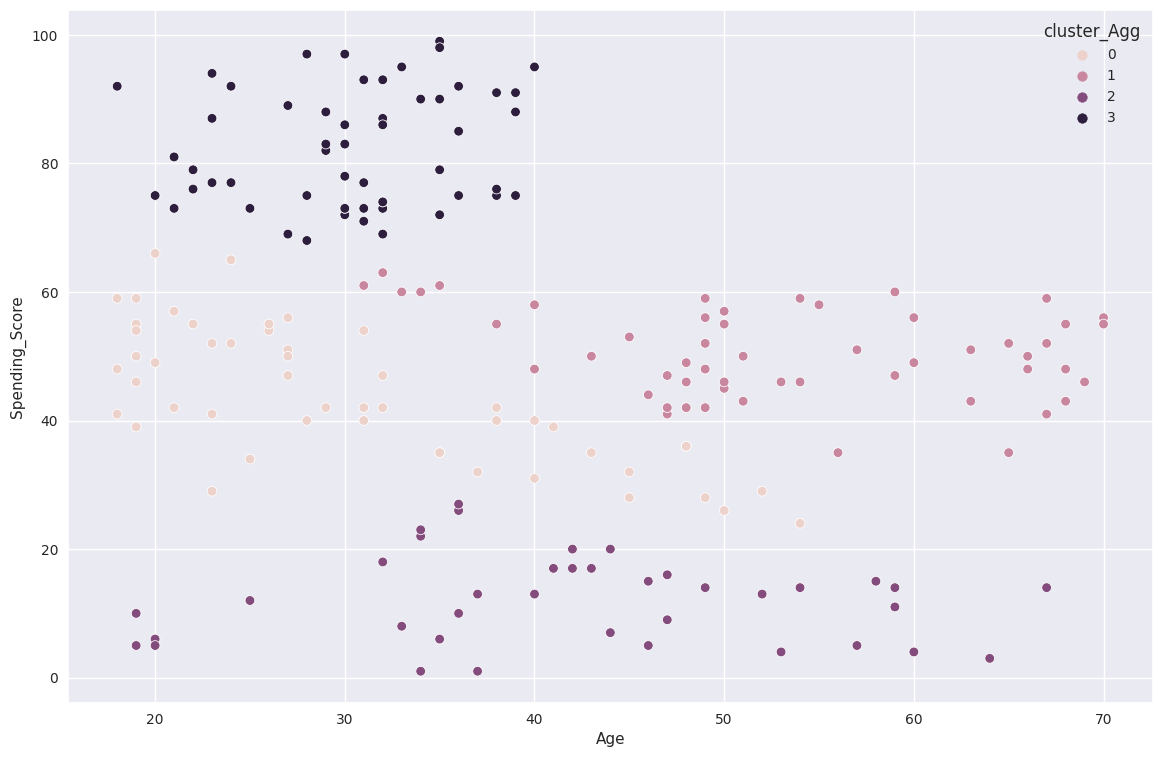

In [311]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_X1)

In [312]:
df_X1.columns

Index(['Age', 'Spending_Score', 'predicted_clusters', 'Meaningful Labels',
       'cluster_Agg'],
      dtype='object')

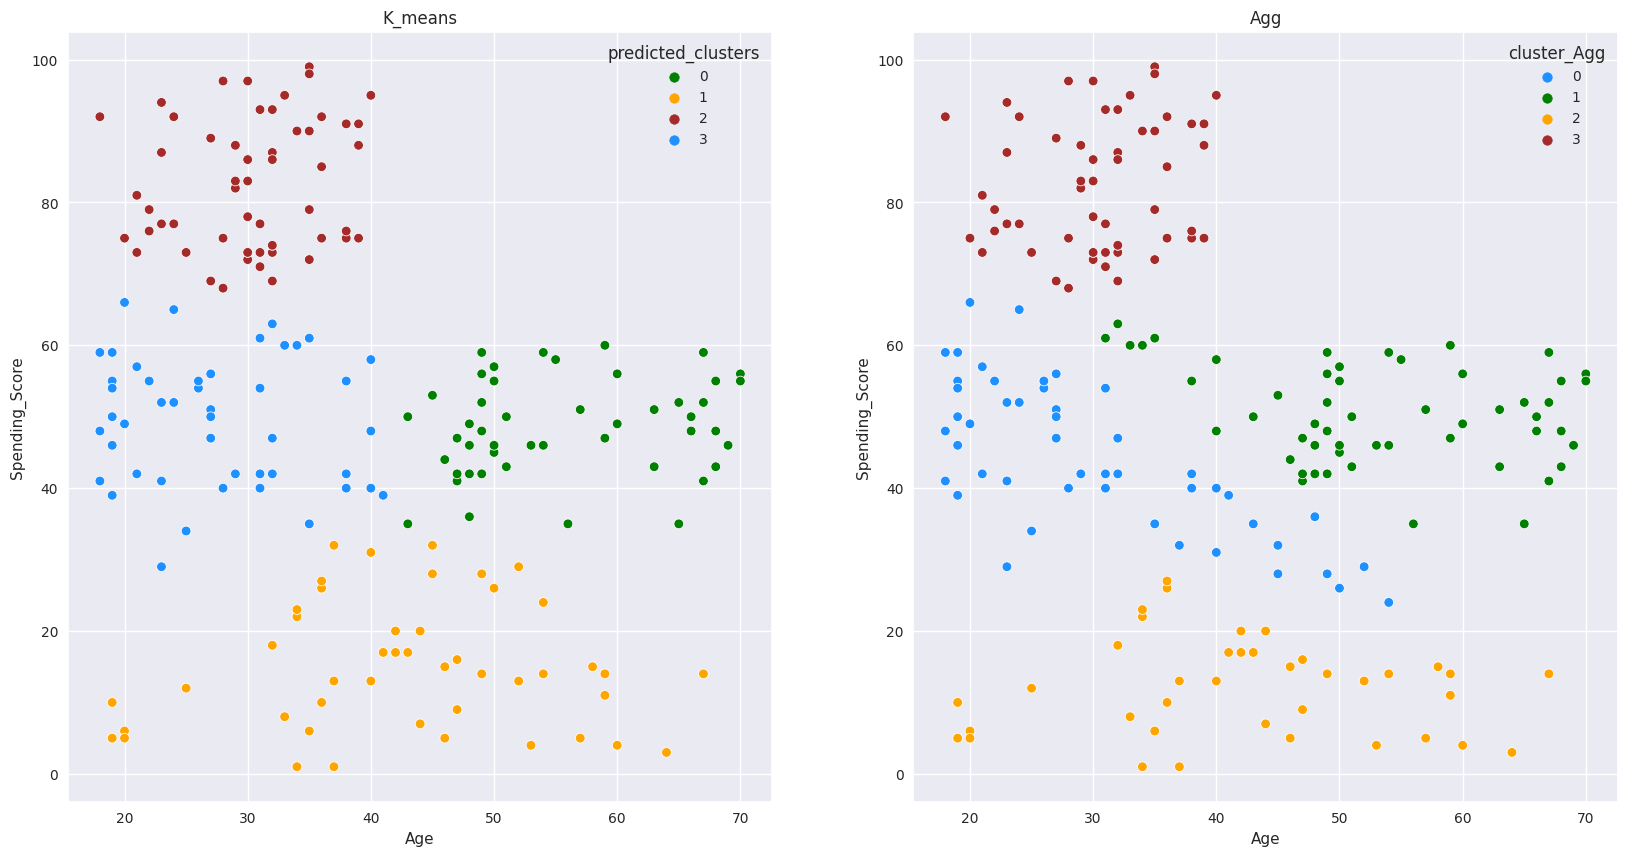

In [313]:
#compare the Kmeans clustering and Hierarchical clustering
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='predicted_clusters',
                data=df_X1,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending_Score',
                hue='cluster_Agg',
                data=df_X1,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

#### Annual Income and Spending Score- x2

In [314]:
df_X2.columns

Index(['Annual_Income', 'Spending_Score', 'predicted_clusters',
       'Meaningful Labels', 'Agg_clusters'],
      dtype='object')

Text(0.5, 1.0, 'Annual Income vs Spending score')

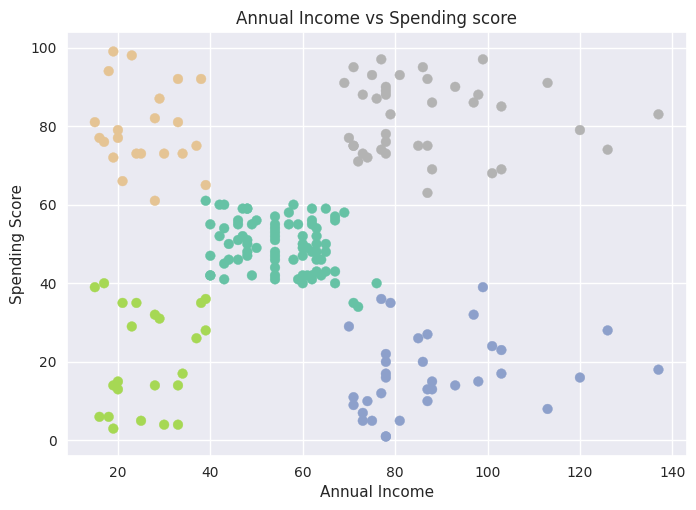

In [315]:
plt.scatter(data=df_X2, x="Annual_Income", y="Spending_Score", c='predicted_clusters', cmap='Set2')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending score')

In [316]:
df_X2.predicted_clusters.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters, dtype: int64

Text(0.5, 1.0, 'Agg')

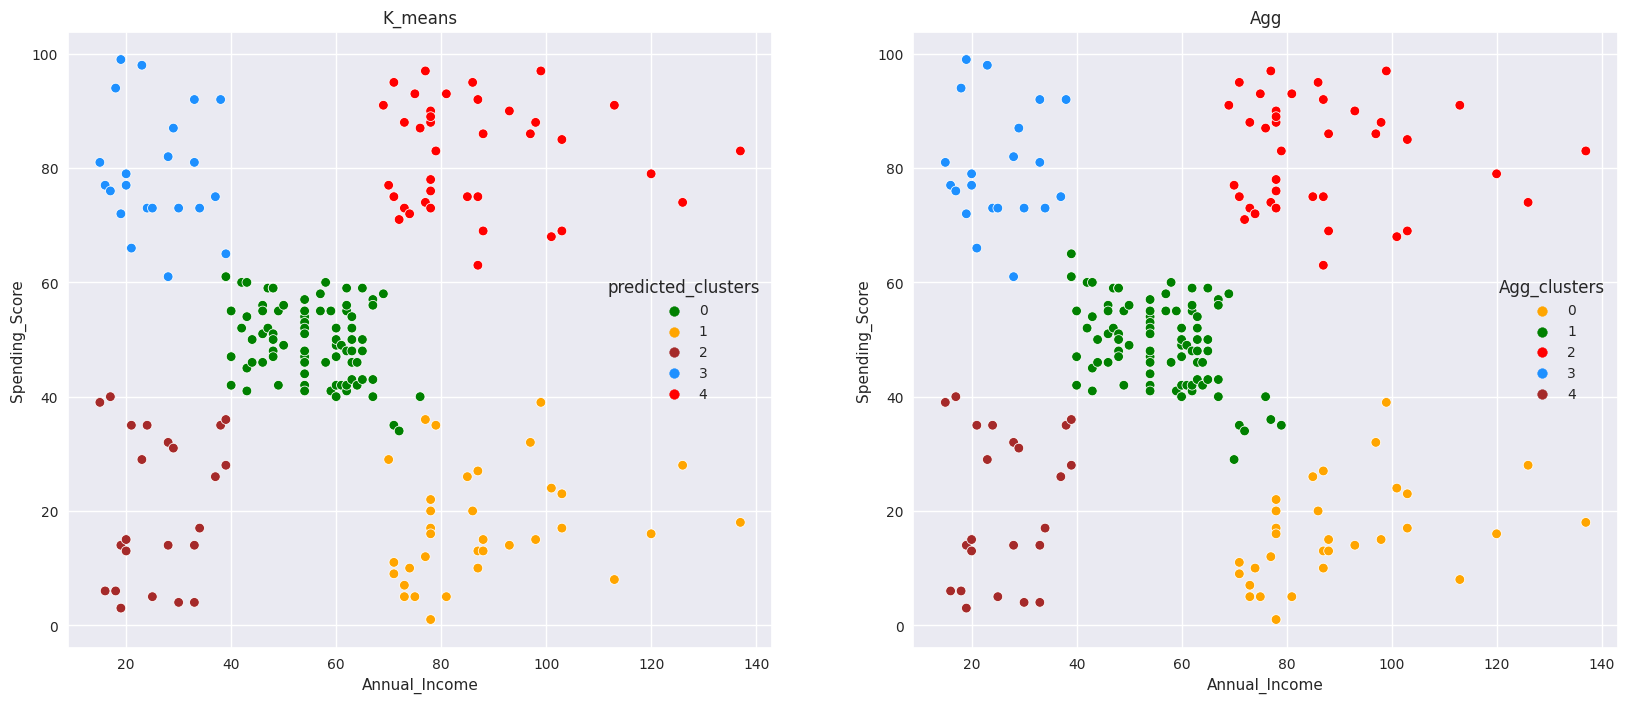

In [317]:
#compare the Kmeans clustering and Hierarchical clustering
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='predicted_clusters',
                data=df_X2,
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income',
                y='Spending_Score',
                hue='Agg_clusters',
                data=df_X2,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

In [318]:
df_X1
#predicted_clusters = Kmeans clustering

,Age,Spending_Score,predicted_clusters,Meaningful Labels,cluster_Agg
0,19,39,3,young med spenders,0
1,21,81,2,young high spenders,3
2,20,6,1,diverse low spenders,2
3,23,77,2,young high spenders,3
4,31,40,3,young med spenders,0
...,...,...,...,...,...
195,35,79,2,young high spenders,3
196,45,28,1,diverse low spenders,0
197,32,74,2,young high spenders,3
198,32,18,1,diverse low spenders,2


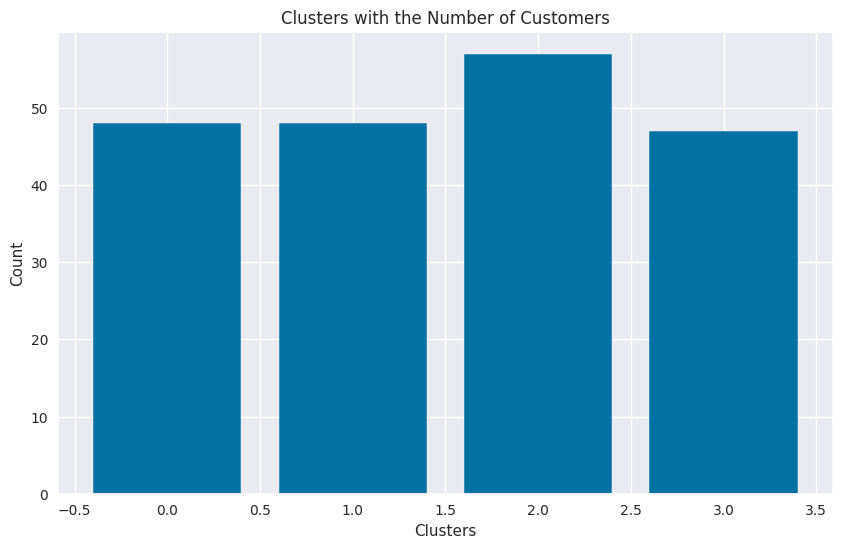

In [319]:
#visualize the number of values in all the classes (customers)
cluster_counts = df_X1['predicted_clusters'].value_counts()
labels = cluster_counts.index
values = cluster_counts.values

plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.title("Clusters with the Number of Customers")
plt.xlabel("Clusters")
plt.ylabel("Count")

plt.show()

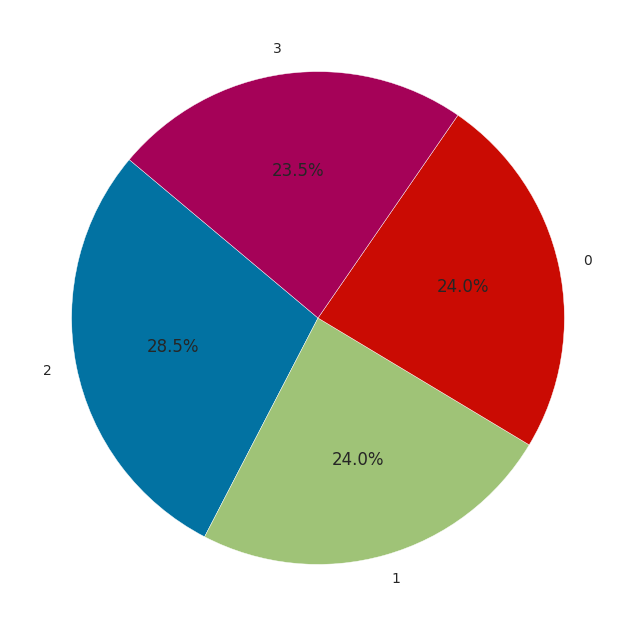

In [320]:
#visualize the percentage of values in all the classes
cluster_counts = df_X1['predicted_clusters'].value_counts()
labels = cluster_counts.index
sizes = cluster_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

In [321]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

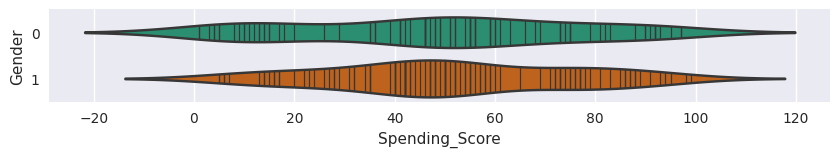

In [322]:
# The spending score could change based on gender so let's apply some visualization methods to investigate more
def horizontal_violin_plot(df, value_colname, facet_colname, figscale=0.1, palette_name='Dark2', **kwargs):
    figsize = (1.2 * figscale * len(df[facet_colname].unique()), 12 * figscale)
    plt.figure(figsize=figsize)
    sns.violinplot(data=df, x=facet_colname, y=value_colname, palette=palette_name, orient='h', **kwargs)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.show()

# Replace _df_35 with your DataFrame
horizontal_violin_plot(df, 'Gender','Spending_Score' , palette_name='Dark2', inner='stick')


In [323]:
df_X1

,Age,Spending_Score,predicted_clusters,Meaningful Labels,cluster_Agg
0,19,39,3,young med spenders,0
1,21,81,2,young high spenders,3
2,20,6,1,diverse low spenders,2
3,23,77,2,young high spenders,3
4,31,40,3,young med spenders,0
...,...,...,...,...,...
195,35,79,2,young high spenders,3
196,45,28,1,diverse low spenders,0
197,32,74,2,young high spenders,3
198,32,18,1,diverse low spenders,2


In [324]:
df["cluster_Age_Spending_Score"] = df_X1.predicted_clusters
df.head()

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,1
3,1,23,16,77,2
4,1,31,17,40,3


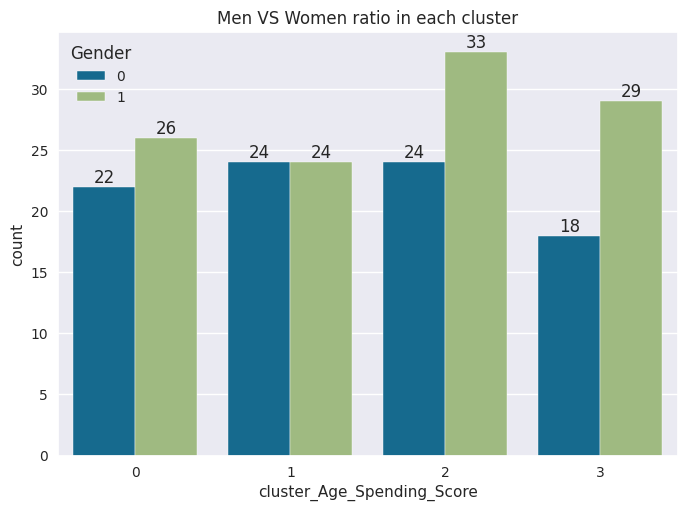

In [325]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [326]:
#The average values of the spending based on the gender, age, and Annual Income
df.groupby("cluster_Age_Spending_Score").mean()

,Gender,Age,Annual_Income,Spending_Score
cluster_Age_Spending_Score,,,,
0,0.541667,55.708333,54.770833,48.229167
1,0.500000,43.291667,66.937500,15.020833
2,0.578947,30.175439,66.070175,82.350877
3,0.617021,27.617021,53.276596,49.148936


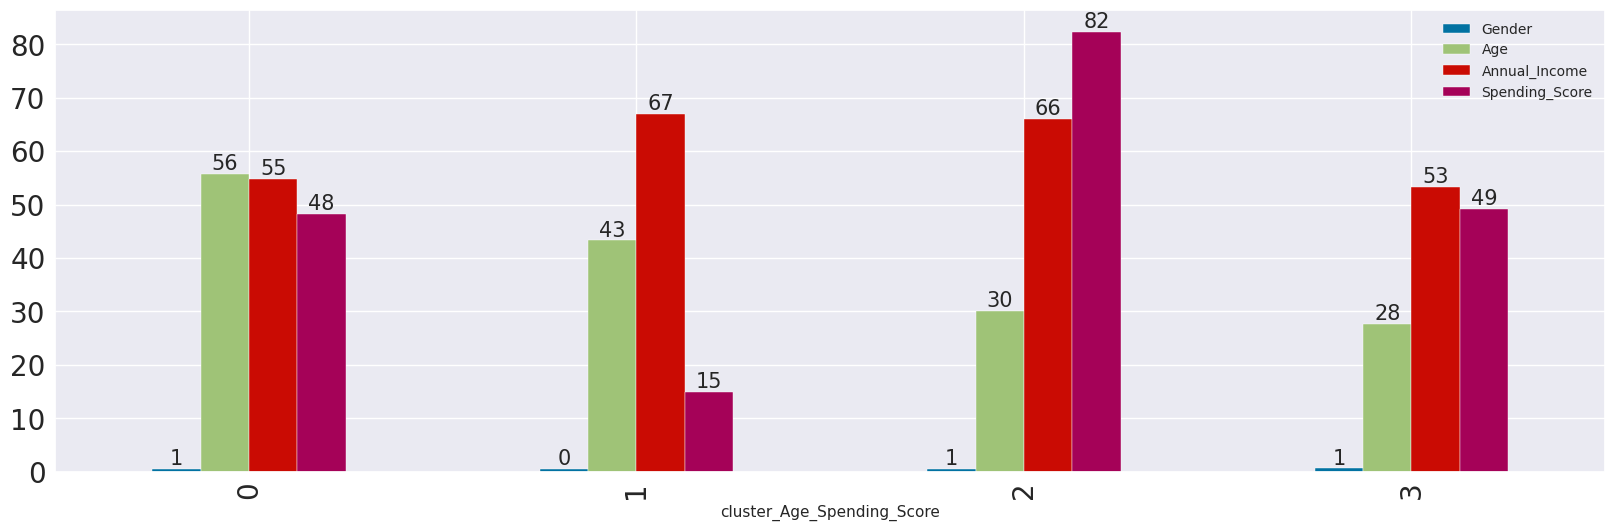

In [327]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

### Conclusion

**cluster 0** : The average age is around 56, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

***As a result, we can say that cluster 2 is represent the permanent customers that we must keep and give some discounts ✅***

In [328]:
#We can see the Meaningful Labels column here which interprets cluster 2
df_X1

,Age,Spending_Score,predicted_clusters,Meaningful Labels,cluster_Agg
0,19,39,3,young med spenders,0
1,21,81,2,young high spenders,3
2,20,6,1,diverse low spenders,2
3,23,77,2,young high spenders,3
4,31,40,3,young med spenders,0
...,...,...,...,...,...
195,35,79,2,young high spenders,3
196,45,28,1,diverse low spenders,0
197,32,74,2,young high spenders,3
198,32,18,1,diverse low spenders,2


#### Interpretation based on Annual Income and Spending Score- x2

In [329]:
df_X2

,Annual_Income,Spending_Score,predicted_clusters,Meaningful Labels,Agg_clusters
0,15,39,2,low income low spenders,4
1,15,81,3,low income high spenders,3
2,16,6,2,low income low spenders,4
3,16,77,3,low income high spenders,3
4,17,40,2,low income low spenders,4
...,...,...,...,...,...
195,120,79,4,high income high spenders,2
196,126,28,1,high income low spenders,0
197,126,74,4,high income high spenders,2
198,137,18,1,high income low spenders,0


In [330]:
df_X2.predicted_clusters.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters, dtype: int64

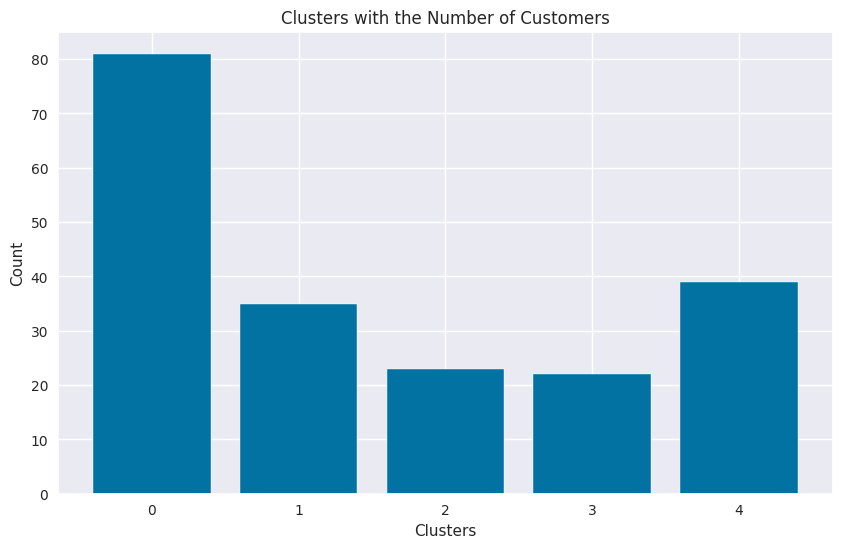

In [331]:
#visualize the number of values in all the classes (customers)
cluster_counts = df_X2['predicted_clusters'].value_counts()
labels = cluster_counts.index
values = cluster_counts.values

plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.title("Clusters with the Number of Customers")
plt.xlabel("Clusters")
plt.ylabel("Count")

plt.show()

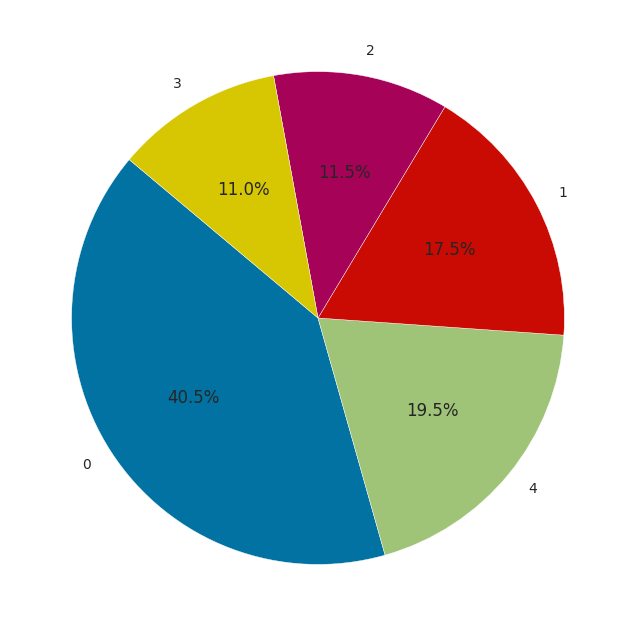

In [332]:
#visualize the percentage of values in all the classes
cluster_counts = df_X2['predicted_clusters'].value_counts()
labels = cluster_counts.index
sizes = cluster_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

In [333]:
df

,Gender,Age,Annual_Income,Spending_Score,cluster_Age_Spending_Score
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,1
3,1,23,16,77,2
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,1
197,0,32,126,74,2
198,0,32,137,18,1


In [334]:
#dropping the cluster_Age_Spending_Score column
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

In [335]:
# Then adding Annual_Income_Spending_Score column
df["Annual_Income_Spending_Score"] = df_X2.predicted_clusters
df.head()

,Gender,Age,Annual_Income,Spending_Score,Annual_Income_Spending_Score
0,0,19,15,39,2
1,0,21,15,81,3
2,1,20,16,6,2
3,1,23,16,77,3
4,1,31,17,40,2


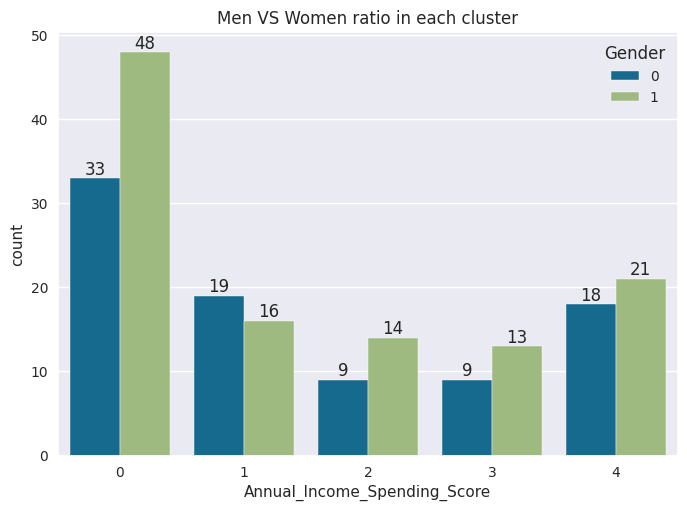

In [336]:
#Spending and annual income based on the gender
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

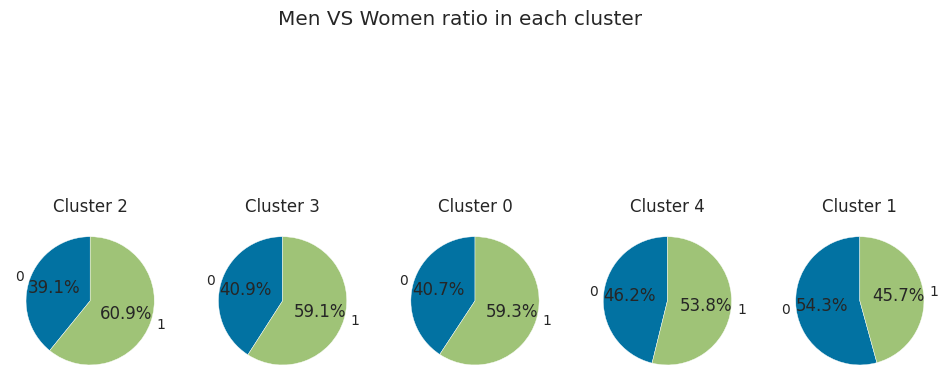

In [337]:
plt.figure(figsize=(12, 6))
plt.suptitle("Men VS Women ratio in each cluster")

unique_clusters = df.Annual_Income_Spending_Score.unique()
num_clusters = len(unique_clusters)

for i, cluster in enumerate(unique_clusters):
    plt.subplot(1, num_clusters, i + 1)
    plt.title(f"Cluster {cluster}")

    # Filter the data for the current cluster
    cluster_data = df[df.Annual_Income_Spending_Score == cluster]

    # Calculate the Men and Women count in the cluster
    # 0 = men, 1 = Women
    men_count = cluster_data[cluster_data.Gender == 0].shape[0]
    women_count = cluster_data[cluster_data.Gender == 1].shape[0]

    # Create labels for the pie chart
    labels = [0, 1]
    sizes = [men_count, women_count]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()

**We can see that women have higher values than men, but we can say that it is because the value in the "Gender" is more than half for women.**

In [338]:
#Let's calculate the mean values for each cluster
df.groupby(["Gender", "Annual_Income_Spending_Score"]).mean()

Age  Annual_Income  Spending_Score
Gender Annual_Income_Spending_Score                                          
0      0                             45.363636      55.212121       50.272727
       1                             39.315789      85.894737       12.947368
       2                             48.333333      24.666667       19.666667
       3                             25.000000      25.777778       77.666667
       4                             33.277778      87.111111       82.666667
1      0                             40.895833      55.354167       49.000000
       1                             43.250000      90.937500       22.062500
       2                             43.214286      27.357143       21.714286
       3                             25.461538      25.692308       80.538462
       4                             32.190476      86.047619       81.666667

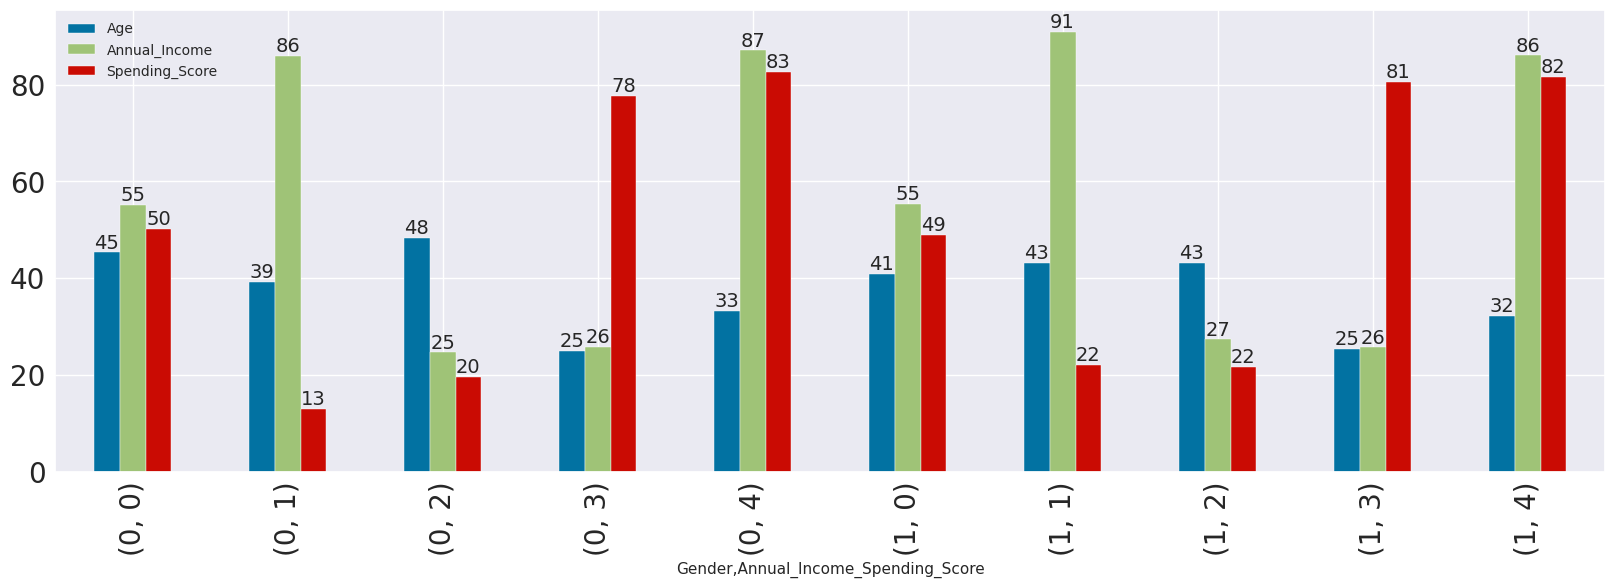

In [339]:
#Let's Visualize the mean values for each column with (Gender foe each cluster)
ax = df.groupby(["Gender", "Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                             fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Female

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

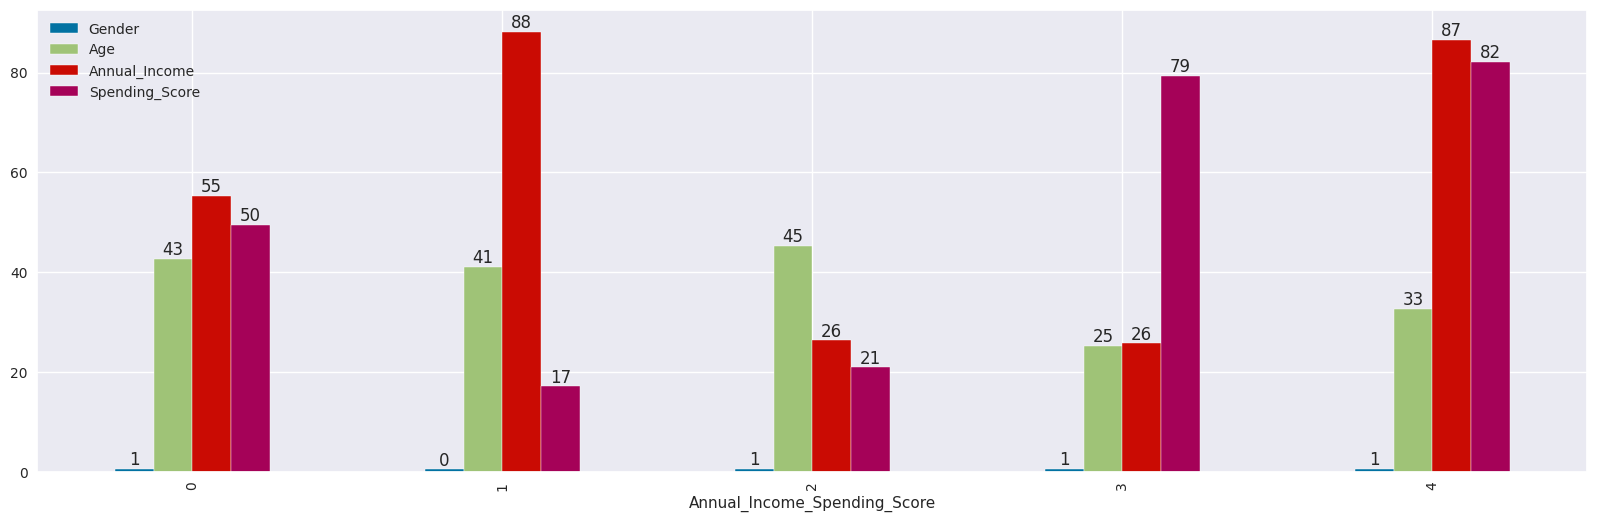

In [340]:
#Visualize the mean values (all data) for each cluster
ax = df.groupby("Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, annula_income is very highand but the spending_scores are very low.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, and both annual income and spending_score are almost the same and very high.
is very low. This group is our target audience and special strategies need to be developed for this
group.

In [341]:
#We can see from this table also the Meaningful Labels which present an interpretation for each cluster
df_X2

,Annual_Income,Spending_Score,predicted_clusters,Meaningful Labels,Agg_clusters
0,15,39,2,low income low spenders,4
1,15,81,3,low income high spenders,3
2,16,6,2,low income low spenders,4
3,16,77,3,low income high spenders,3
4,17,40,2,low income low spenders,4
...,...,...,...,...,...
195,120,79,4,high income high spenders,2
196,126,28,1,high income low spenders,0
197,126,74,4,high income high spenders,2
198,137,18,1,high income low spenders,0


## **As a result, the mean values of clusters for the dataset and scatter plots show a meaningful interpretation for the clusters. In addition, I did not apply scaling because the data was in the same range so I decided to not use it in this project. In the future, applying one of any supervised learning algorithms will evaluate this work more from my perspective. In addition, implementing scaling and comparing the results with and without scaling could enhance this project.**

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___